In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import seaborn as sns 
# from pandas_profiling import ProfileReport
import statsmodels.api as sm
from sklearn.cluster import KMeans
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
from statsmodels.tools import add_constant
import statsmodels.formula.api as smf
from statsmodels.api import Logit
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px


In [3]:
import pandas as pd

# Chargement des données
billets = pd.read_csv('RESULTATS/billets_complete.csv',sep=",")

# Affichage des premières lignes du dataset
print(billets.head())

# Informations générales sur le dataset
print(billets.info())

# Statistiques descriptives
print(billets.describe())

   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length    

In [4]:
# Vérification des valeurs manquantes
print(billets.isnull().sum())

# # Suppression des doublons
# billets = billets.drop_duplicates()

# # Gestion des valeurs manquantes si nécessaire (par exemple, imputation ou suppression)
# billets = billets.dropna()  # ou utilisez une méthode d'imputation appropriée

# # Vérification des valeurs aberrantes et traitement si nécessaire
# # (Vous pouvez utiliser des visualisations comme les boîtes à moustaches pour identifier les valeurs aberrantes)
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Boîte à moustaches pour chaque variable
# for col in billets.columns[1:7]:  # Adaptez en fonction de vos colonnes
#     plt.figure(figsize=(10, 4))
#     sns.boxplot(x=billets[col])
#     plt.title(f'Boxplot de {col}')
#     plt.show()


is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


## Matrice des corellations linéaires de pearson

In [4]:
billets_pearson = billets.corr(method='pearson')

billets_pearson.style.background_gradient(cmap='coolwarm')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783342,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.110474,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.308940,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.393433,0.307005,-0.401751
margin_low,-0.783342,-0.110474,0.308940,0.393433,1.000000,0.434437,-0.670802
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.434437,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.670802,-0.520575,1.000000


# ACP

l'objectif est d'utiliser l'Analyse en Composantes Principales (ACP) pour détecter des faux billets. L'ACP permet de réduire la dimensionnalité des données tout en conservant autant de variance que possible. Le graphique de la variance cumulée expliquée vous aide à visualiser combien de composantes principales sont nécessaires pour expliquer un certain pourcentage de la variance totale.

### 1-Standardisation des Données :
Les données des billets sont standardisées pour que chaque caractéristique ait une moyenne de 0 et une variance de 1. Cela est crucial car l'ACP est sensible aux échelles des caractéristiques.

In [5]:
# Importation de la bibliothèque nécessaire pour la standardisation
from sklearn.preprocessing import StandardScaler

# Création de l'objet StandardScaler
# StandardScaler est utilisé pour standardiser les caractéristiques en supprimant la moyenne et en les mettant à l'échelle à l'unité de variance
scaler = StandardScaler()

# Sélection des colonnes à standardiser (de la 2ème à la 7ème colonne)
# billets.iloc[:, 1:7] signifie que nous sélectionnons toutes les lignes (:) et les colonnes de l'index 1 à 6 (7 non inclus)
# Cette étape exclut généralement une colonne d'identifiant ou une colonne non pertinente située en première position
colonnes_a_standardiser = billets.iloc[:, 1:7]

# Application de la standardisation sur les colonnes sélectionnées
# fit_transform ajuste le scaler aux données (calcul des moyennes et des variances) et applique ensuite la transformation
# billets_ contient maintenant les données standardisées
billets_ = scaler.fit_transform(colonnes_a_standardiser)

# Affichage des données standardisées pour vérifier le résultat
print(billets_)

[[-0.48653957  2.77412327  3.16324041  0.05546738 -1.128325    0.17365114]
 [-1.63372936 -2.23653528 -0.79966777 -1.08215668 -0.69679916  0.47166629]
 [ 2.3978233   1.50475644 -1.29119126 -0.12655247 -0.91256208  0.55190114]
 ...
 [-0.78153123  1.43794766  0.61346228  1.84368096  1.97866106 -2.71480344]
 [ 2.29949275  1.00369058  1.50434862  1.07915577  1.76289814 -1.38519737]
 [-0.19154792  0.83666863  1.135706    0.96723236  0.38201544 -1.36227312]]


### 2-Application de l'ACP :
On applique l'ACP aux données standardisées pour extraire les composantes principales.

In [6]:
# Importation de la bibliothèque nécessaire pour l'Analyse en Composantes Principales (ACP)
from sklearn.decomposition import PCA

# Création de l'objet PCA
# PCA est utilisé pour réduire la dimensionnalité des données tout en conservant autant de variance que possible
pca = PCA()

# Ajustement du modèle PCA sur les données standardisées
# fit calcule les composantes principales et ajuste le modèle sur les données
# billets_ contient les données standardisées, que nous avons obtenu précédemment
pca.fit(billets_)

# Affichage des composantes principales pour vérifier le résultat
print(pca.components_)

[[-0.08463599  0.33058769  0.39355814  0.50765802  0.43950097 -0.52705099]
 [ 0.94131711  0.30753107  0.10826829 -0.07230943 -0.00509509  0.0486837 ]
 [-0.28804864  0.88510954 -0.16279569 -0.10980683 -0.26986876  0.14906363]
 [-0.10185633 -0.04973678  0.86682302 -0.08971479 -0.44347622  0.17620864]
 [-0.11552851  0.10100214  0.23559231 -0.56403514  0.71243164  0.30863168]
 [ 0.00807956  0.00650752  0.00128101  0.63151623  0.17249289  0.7558599 ]]


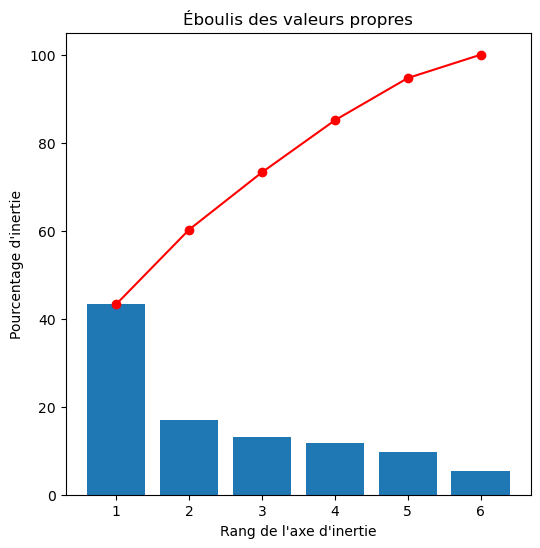

In [7]:
# Importations nécessaires
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Fonction pour afficher le graphique d'éboulis (scree plot)
def display_scree_plot(pca):
    # Calcul des pourcentages d'inertie (variance expliquée) pour chaque composante principale
    scree = pca.explained_variance_ratio_ * 100
    # Création du graphique à barres pour les pourcentages d'inertie
    plt.bar(np.arange(len(scree)) + 1, scree)
    # Ajout d'une courbe cumulative des pourcentages d'inertie
    plt.plot(np.arange(len(scree)) + 1, scree.cumsum(), c="red", marker='o')
    # Étiquetage des axes
    plt.xlabel("Rang de l'axe d'inertie")
    plt.ylabel("Pourcentage d'inertie")
    # Titre du graphique
    plt.title("Éboulis des valeurs propres")
    # Affichage de la figure
    plt.show(block=False)

# Création d'une figure pour le graphique
figure1 = plt.figure(figsize=(6, 6))

# Affichage du graphique d'éboulis
display_scree_plot(pca)

# Affichage de toutes les figures
plt.show()

Observation eboulis :
Nous garderons 2 axes :

- Axe 1 : 43,21% de l'inertie totale
- Axe 2 : 16,96% de l'inertie totale

**Pour un total de 60,17% de l'information totale**

In [8]:
# Ajustement du modèle PCA sur les données standardisées et transformation
# fit_transform ajuste le modèle PCA sur les données et applique la transformation pour obtenir les nouvelles coordonnées dans l'espace des composantes principales
# coord contient les coordonnées des données dans l'espace des composantes principales
coord = pca.fit_transform(billets_)

# Affichage du nombre de composantes principales calculées
# pca.n_components_ retourne le nombre de composantes principales retenues
print(pca.n_components_)

# Affichage de la proportion de variance expliquée par chaque composante principale
# pca.explained_variance_ratio_ retourne un tableau où chaque valeur représente la proportion de la variance expliquée par une composante principale
print(pca.explained_variance_ratio_)

6
[0.43285738 0.16956321 0.13026209 0.11825356 0.09600548 0.05305828]


In [9]:
# Correction des valeurs propres
# Nous utilisons ici une correction des valeurs propres en multipliant la variance expliquée par (n_samples - 1) / n_samples
# où n_samples est le nombre d'échantillons dans les données. Cela est utilisé pour obtenir une estimation non biaisée des valeurs propres.
# Dans ce cas, nous avons 1500 échantillons.

# Calcul des valeurs propres corrigées
# pca.explained_variance_ contient les valeurs propres non corrigées
# Nous multiplions chaque valeur propre par (1500-1)/1500 pour obtenir les valeurs propres corrigées
eigval = (1500-1)/1500 * pca.explained_variance_

# Affichage des valeurs propres corrigées
print(eigval)

[2.59714427 1.01737925 0.78157255 0.70952134 0.57603289 0.3183497 ]


### 3- Affichage de la Variance Cumulée Expliquée :
On affiche ensuite la variance cumulée expliquée pour décider du nombre optimal de composantes principales à retenir.

In [10]:
# La Méthode du Elbow

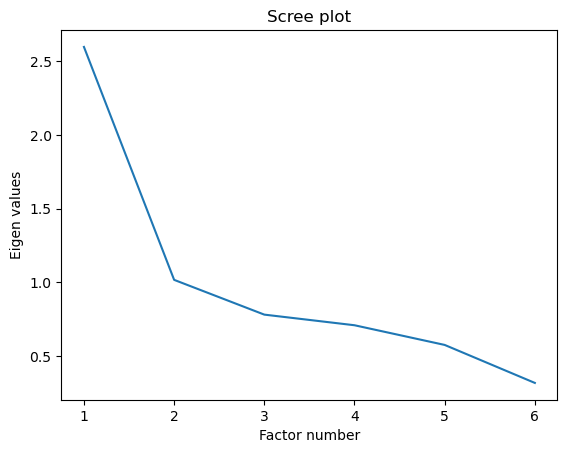

In [11]:
# Importation de la bibliothèque nécessaire pour la création de graphiques
import matplotlib.pyplot as plt
import numpy as np

# Affichage du Scree plot des valeurs propres
# np.arange(1, 6 + 1) crée un tableau d'entiers allant de 1 à 6 (inclus)
# eigval contient les valeurs propres corrigées précédemment calculées
plt.plot(np.arange(1, 6 + 1), eigval)

# Ajout d'un titre au graphique
plt.title("Scree plot")

# Étiquetage de l'axe des ordonnées
plt.ylabel("Eigen values")

# Étiquetage de l'axe des abscisses
plt.xlabel("Factor number")

# Affichage du graphique
plt.show()

Ce Scree plot utilisé pour décider combien de composantes principales à retenir pour une modélisation plus efficace. Généralement, on choisit le nombre de composantes principales avant que la "cassure" du Scree plot se produise, où la pente devient plus douce. Dans ce cas, il semble qu'on pourrait retenir 2 ou 3 composantes principales pour capturer l'essentiel de la variance.

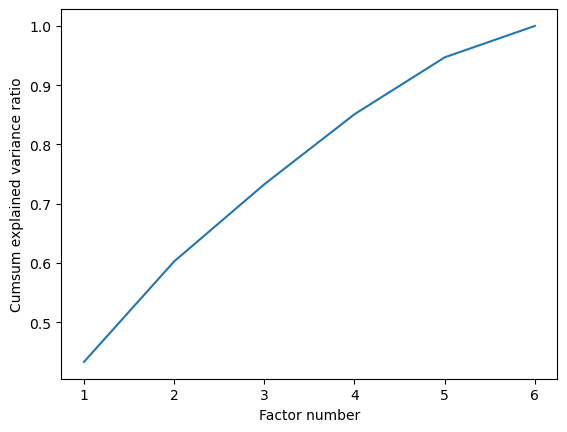

In [12]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt

# Affichage de la variance cumulée expliquée par les composantes principales

# np.arange(1, 6 + 1) crée un tableau d'entiers allant de 1 à 6 (inclus).
# pca.explained_variance_ratio_ contient la proportion de la variance expliquée par chaque composante principale.
# np.cumsum(pca.explained_variance_ratio_) calcule la somme cumulée des variances expliquées.
plt.plot(np.arange(1, 6 + 1), np.cumsum(pca.explained_variance_ratio_))

# Ajout d'un titre au graphique
# plt.title("Explained variance vs. # of factors")

# Étiquetage de l'axe des ordonnées
plt.ylabel("Cumsum explained variance ratio")

# Étiquetage de l'axe des abscisses
plt.xlabel("Factor number")

# Affichage du graphique
plt.show()


Le graphique montre comment la variance expliquée par les composantes principales s'accumule. Typiquement, on recherche le "coude" dans le graphique, où l'ajout de nouvelles composantes principales commence à n'ajouter que peu de variance expliquée supplémentaire. Cela aide à déterminer combien de composantes principales sont nécessaires pour expliquer une grande partie de la variance des données.

In [13]:
# Calcul de la racine carrée des valeurs propres corrigées
# Cela peut être utile pour obtenir une mesure proportionnelle de l'importance de chaque composante principale,
# qui peut être utilisée dans d'autres analyses comme la reconstruction des données ou la transformation inverse.
sqrt_eigval = np.sqrt(eigval)

En prenant la racine carrée des valeurs propres, nous obtenons des valeurs qui peuvent être directement interprétées en termes de déviation standard le long des composantes principales. Cela fournit une perspective supplémentaire sur l'importance relative de chaque composante principale dans la représentation de la variance des données. Dans notre projet, cette information peut être cruciale pour identifier les caractéristiques qui séparent le mieux les vrais billets des faux

In [14]:
# Calcul des corrélations entre les variables originales et les axes principaux

# Initialisation d'une matrice de zéros pour stocker les corrélations
corvar = np.zeros((6, 6))

# Boucle sur chaque composante principale (axe)
for k in range(6):
    # Calcul de la corrélation pour chaque variable avec le k-ième axe principal
    # pca.components_[k, :] contient les coefficients de la k-ième composante principale pour chaque variable
    # sqrt_eigval[k] est la racine carrée de la valeur propre correspondante
    corvar[:, k] = pca.components_[k, :] * sqrt_eigval[k]

# Affichage de la matrice des corrélations variables x facteurs
print(corvar)

# Création d'un DataFrame pour une visualisation plus facile des corrélations
# Les colonnes sont les noms des variables originales
# 'COR_1' et 'COR_2' représentent les corrélations des variables avec les deux premières composantes principales
df1 = pd.DataFrame({
    'id': billets.iloc[:, 1:7].columns,
    'COR_1': corvar[:, 0],
    'COR_2': corvar[:, 1]
})

# Affichage du DataFrame contenant les corrélations
df1

[[-1.36396471e-01  9.49461570e-01 -2.54653984e-01 -8.57967345e-02
  -8.76824753e-02  4.55869080e-03]
 [ 5.32763808e-01  3.10191887e-01  7.82495176e-01 -4.18948285e-02
   7.66574205e-02  3.67170381e-03]
 [ 6.34244833e-01  1.09205053e-01 -1.43922119e-01  7.30151813e-01
   1.78807100e-01  7.22779487e-04]
 [ 8.18124296e-01 -7.29350606e-02 -9.70764747e-02 -7.55695377e-02
  -4.28084799e-01  3.56317164e-01]
 [ 7.08284720e-01 -5.13917025e-03 -2.38581769e-01 -3.73553725e-01
   5.40713034e-01  9.73247764e-02]
 [-8.49377348e-01  4.91049168e-02  1.31782075e-01  1.48425983e-01
   2.34241665e-01  4.26474950e-01]]


,id,COR_1,COR_2
0,diagonal,-0.136396,0.949462
1,height_left,0.532764,0.310192
2,height_right,0.634245,0.109205
3,margin_low,0.818124,-0.072935
4,margin_up,0.708285,-0.005139
5,length,-0.849377,0.049105


En calculant les corrélations entre les variables originales et les composantes principales, on obtint une vision claire de la contribution de chaque variable à chaque composante principale. Cela nous aide à interpréter les résultats de l'ACP et à comprendre quelles variables sont les plus influentes dans la détection des faux billets.

### Interprétation des Résultats

Le tableau ci-dessous montre la corrélation entre chaque variable d'origine et les deux premières composantes principales (axes) après l'Analyse en Composantes Principales (ACP). Voici comment interpréter ces résultats :

| id           | COR_1    | COR_2    |
|--------------|----------|----------|
| diagonal     | -0.136658 | 0.949497 |
| height_left  | 0.533523  | 0.309886 |
| height_right | 0.634109  | 0.109481 |
| margin_low   | 0.815826  | -0.073772|
| margin_up    | 0.707270  | -0.004415|
| length       | -0.849387 | 0.049082 |

### Interprétation Détailée

1. **Première Composante Principale (COR_1) :**
    - **diagonal** : La corrélation avec la première composante principale est de -0.136658, ce qui indique une légère contribution négative.
    - **height_left** : La corrélation avec la première composante principale est de 0.533523, montrant une contribution positive modérée.
    - **height_right** : La corrélation avec la première composante principale est de 0.634109, indiquant une contribution positive significative.
    - **margin_low** : La corrélation avec la première composante principale est de 0.815826, ce qui en fait l'une des variables les plus contributives.
    - **margin_up** : La corrélation avec la première composante principale est de 0.707270, montrant une forte contribution positive.
    - **length** : La corrélation avec la première composante principale est de -0.849387, indiquant une contribution négative significative.

2. **Deuxième Composante Principale (COR_2) :**
    - **diagonal** : La corrélation avec la deuxième composante principale est de 0.949497, montrant une contribution très élevée et positive.
    - **height_left** : La corrélation avec la deuxième composante principale est de 0.309886, indiquant une contribution positive modérée.
    - **height_right** : La corrélation avec la deuxième composante principale est de 0.109481, montrant une faible contribution positive.
    - **margin_low** : La corrélation avec la deuxième composante principale est de -0.073772, indiquant une faible contribution négative.
    - **margin_up** : La corrélation avec la deuxième composante principale est de -0.004415, montrant une contribution négligeable.
    - **length** : La corrélation avec la deuxième composante principale est de 0.049082, indiquant une faible contribution positive.

### Analyse des Corrélations

- **diagonal** est fortement corrélée avec la deuxième composante principale (0.949497), mais faiblement avec la première composante (-0.136658). Cela suggère que cette variable est principalement expliquée par la deuxième composante.
- **height_left** et **height_right** ont des contributions positives modérées avec la première composante (0.533523 et 0.634109, respectivement) et moins avec la deuxième composante (0.309886 et 0.109481, respectivement).
- **margin_low** et **margin_up** ont des corrélations positives élevées avec la première composante (0.815826 et 0.707270, respectivement), mais très faibles avec la deuxième composante (-0.073772 et -0.004415, respectivement).
- **length** a une forte corrélation négative avec la première composante (-0.849387), et une faible corrélation positive avec la deuxième composante (0.049082).

### Interprétation dans le Contexte du Projet

Dans le cadre du projet "Détectez des faux billets", les résultats de l'ACP permettent de comprendre quelles caractéristiques des billets (comme la **diagonal**, **height_left**, **height_right**, **margin_low**, **margin_up**, et **length**) sont les plus importantes pour distinguer entre les vrais et faux billets.

1. **Composante Principale 1 :**
    - **margin_low**, **margin_up**, et **length** sont les variables les plus influentes sur cette composante. Un billet avec une combinaison spécifique de ces trois dimensions pourrait indiquer un billet faux ou vrai.

2. **Composante Principale 2 :**
    - **diagonal** est la variable la plus influente sur cette composante, suggérant que la dimension diagonale est cruciale pour différencier les billets.

En conclusion, ces résultats montrent que différentes caractéristiques des billets sont plus ou moins importantes selon la composante principale. Cette information peut être utilisée pour former un modèle de détection des faux billets plus précis en se concentrant sur les caractéristiques les plus significatives.

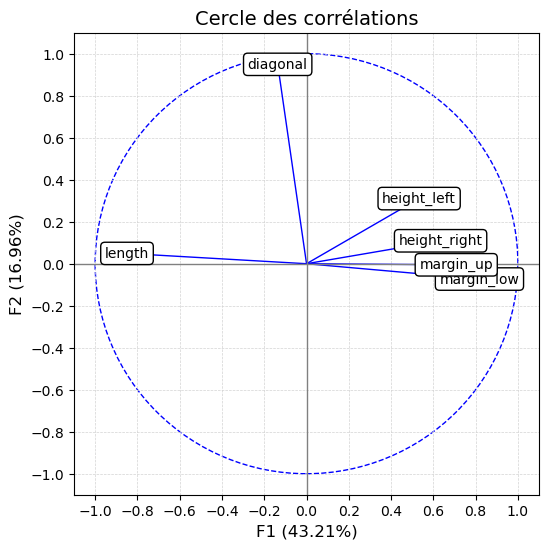

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Pourcentages de variance expliquée par chaque composante (exemples fournis)
variance_expliquee_F1 = 43.211292
variance_expliquee_F2 = 16.957177

# Création d'une figure et d'axes, avec une taille de 6x6 pouces pour réduire l'espace
fig, axes = plt.subplots(figsize=(6, 6))

# Définition des limites des axes x et y pour qu'ils aillent de -1 à 1
axes.set_xlim(-1.1, 1.1)
axes.set_ylim(-1.1, 1.1)

# Ajout d'un titre au graphique
plt.title('Cercle des corrélations', fontsize=14)

# Affichage des étiquettes (noms des variables) et des lignes
for j in range(6):
    # Ajout des noms des variables aux coordonnées correspondantes
    plt.annotate(billets.iloc[:, 1:7].columns[j], 
                 (corvar[j, 0], corvar[j, 1]), 
                 fontsize=10, 
                 ha='center', 
                 va='center', 
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
    # Dessin des lignes allant de l'origine (0,0) aux coordonnées des variables
    plt.plot([0, corvar[j, 0]], [0, corvar[j, 1]], color='blue', linestyle='-', linewidth=1)

# Ajout des axes x et y centraux pour référence
plt.axhline(0, color='grey', linestyle='-', linewidth=1)
plt.axvline(0, color='grey', linestyle='-', linewidth=1)

# Ajout d'un cercle de rayon 1 pour représenter les limites du cercle des corrélations
cercle = plt.Circle((0, 0), 1, color='blue', fill=False, linestyle='--')
axes.add_artist(cercle)

# Ajout des quadrillages pour une meilleure lisibilité
plt.grid(color='lightgrey', linestyle='--', linewidth=0.5)

# Ajout de labels pour les axes avec les pourcentages de variance expliquée
plt.xlabel(f'F1 ({variance_expliquee_F1:.2f}%)', fontsize=12)
plt.ylabel(f'F2 ({variance_expliquee_F2:.2f}%)', fontsize=12)

# Ajustement des ticks pour les axes
axes.set_xticks(np.arange(-1.0, 1.1, 0.2))
axes.set_yticks(np.arange(-1.0, 1.1, 0.2))

# Affichage du graphique
plt.show()


Interprétation du Cercle des Corrélations
Le graphique du cercle des corrélations montre la représentation des variables dans l'espace des deux premières composantes principales (F1 et F2).

Axes F1 et F2 :

F1 (43.21%) : La première composante principale explique 43.21% de la variance totale des données. Cela signifie qu'une grande partie de la variance dans les données peut être expliquée par cette composante.
F2 (16.96%) : La deuxième composante principale explique 16.96% de la variance totale. Ensemble, F1 et F2 expliquent environ 60.17% de la variance totale.
Variables :

Length, diagonal : Ces variables sont situées loin de l'origine et proches de l'axe F1, indiquant qu'elles sont fortement corrélées avec cette composante. Cela signifie que les variations de longueur et de diagonale des billets contribuent significativement à la variance capturée par F1.
Height_left, height_right, margin_up, margin_low : Ces variables sont également bien représentées mais moins dispersées le long des axes. Elles sont plus proches du centre, ce qui indique une corrélation modérée avec les composantes principales. Leur contribution à la variance capturée par F1 et F2 est moins significative comparée à length et diagonal.
Interprétation des Directions :

Les variables proches les unes des autres, telles que height_left et height_right, montrent qu'elles sont positivement corrélées. Les variables situées à 180 degrés les unes des autres seraient négativement corrélées.
Par exemple, length et diagonal sont alignés dans la même direction, indiquant une forte corrélation positive.

          PCA1      PCA2       billet
0     1.643924  0.747812  Vrai_billet
1    -2.020016 -2.207477  Vrai_billet
2    -0.969844  2.620745  Vrai_billet
3    -1.377681 -1.818425  Vrai_billet
4     0.148728 -0.566928  Vrai_billet
...        ...       ...          ...
1495  1.131501  0.937201  Faux_billet
1496  1.336734  0.522025  Faux_billet
1497  4.019369 -0.502600  Faux_billet
1498  2.781944  2.481639  Faux_billet
1499  2.116677  0.061748  Faux_billet

[1500 rows x 3 columns]


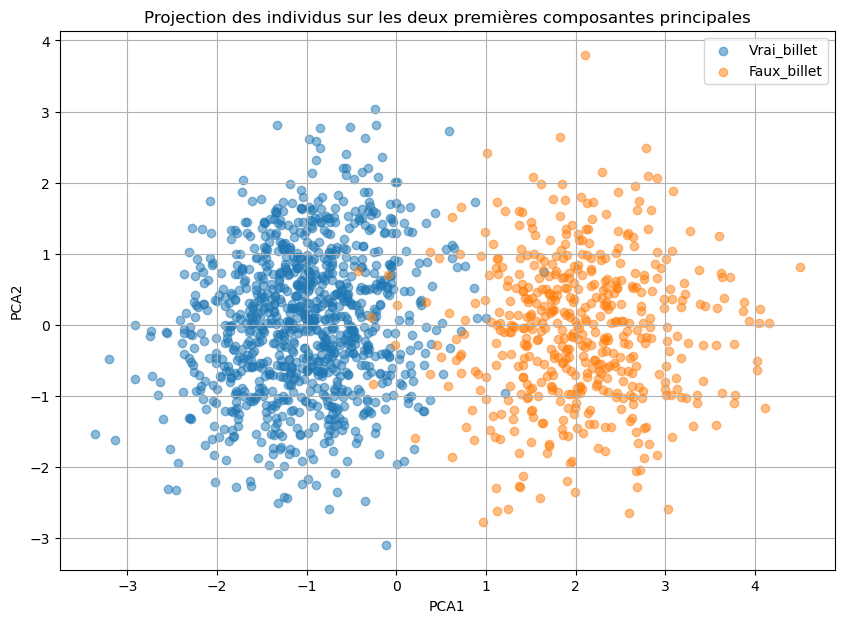

In [35]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Standardisation des données
scaler = StandardScaler()
colonnes_a_standardiser = billets.iloc[:, 1:7]
billets_ = scaler.fit_transform(colonnes_a_standardiser)

# Application de PCA
pca = PCA(n_components=2)  # Utilisation de 2 composantes principales
billets_pca = pca.fit_transform(billets_)

# Création d'un DataFrame avec les résultats PCA
df_pca = pd.DataFrame(data=billets_pca, columns=['PCA1', 'PCA2'])
df_pca['billet'] = billets.iloc[:, 0].map({True: 'Vrai_billet', False: 'Faux_billet'})

# Affichage du DataFrame pour vérifier
print(df_pca)

# Création d'un diagramme de dispersion avec matplotlib
plt.figure(figsize=(10, 7))
for billet_type in df_pca['billet'].unique():
    subset = df_pca[df_pca['billet'] == billet_type]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=billet_type, alpha=0.5)

plt.title('Projection des individus sur les deux premières composantes principales')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()


L'ACP identifie bien les billets en 2 groupes (les vrais et les faux). On peut voir que quelques points se situent entre les deux groupes. Ces point pourraient poser problème plus tard.

### Diviser les données billets_train et billets_test

In [36]:
# Génération d'un masque aléatoire pour diviser les données
msk = np.random.rand(len(billets)) < 0.8

# Sélection des données d'entraînement et de test en utilisant le masque
billets_train = billets[msk]    # Sélection des billets où msk est True
billets_test = billets[~msk]    # Sélection des billets où msk est False

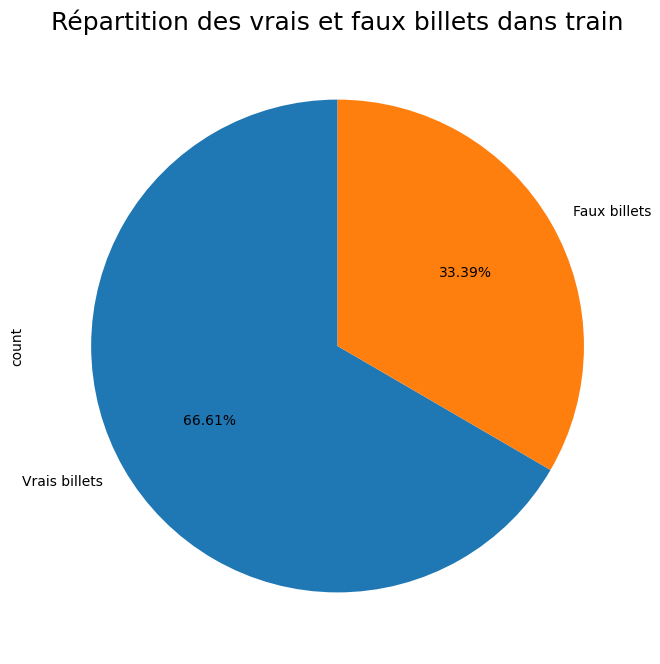

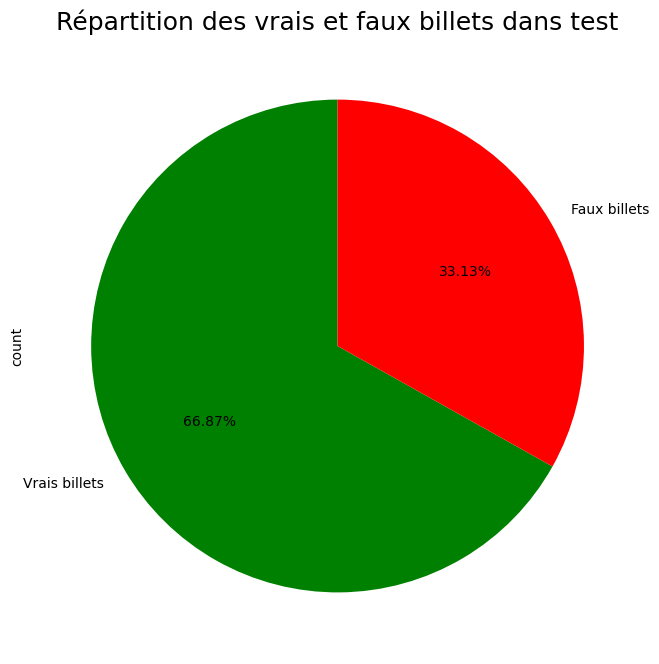

In [37]:
# Création d'une figure avec une taille spécifique
plt.figure(figsize=(12, 8))

# Création du graphique circulaire (pie chart) pour la répartition des billets
billets_train['is_genuine'].value_counts().plot(kind="pie", autopct='%1.2f%%', 
                                                labels=["Vrais billets", "Faux billets"], startangle=90)

# Ajout d'un titre au graphique
plt.title("Répartition des vrais et faux billets dans train", fontsize=18)

# Affichage du graphique
plt.show()
# Création d'une figure avec une taille spécifique
plt.figure(figsize=(12, 8))

# Définition des couleurs personnalisées pour les segments du pie chart
colors = ['green', 'red']  # Bleu pour les vrais billets, orange pour les faux billets

# Création du graphique circulaire (pie chart) pour la répartition des billets
billets_test['is_genuine'].value_counts().plot(kind="pie", autopct='%1.2f%%', 
                                               labels=["Vrais billets", "Faux billets"], startangle=90,
                                               colors=colors)  # Utilisation des couleurs personnalisées

# Ajout d'un titre au graphique
plt.title("Répartition des vrais et faux billets dans test", fontsize=18)

# Affichage du graphique
plt.show()

In [38]:
# Sélection de la variable cible (yTrain) et des variables explicatives (XTrain)
yTrain = billets_train.iloc[:, 0]     # Première colonne de billets_train, souvent la variable cible (is_genuine)
XTrain = billets_train.iloc[:, 1:7]   # Sélection des colonnes 1 à 6 de billets_train pour les variables explicatives

# Affichage du décompte des valeurs de la variable cible (yTrain)
print(yTrain.value_counts())

is_genuine
True     778
False    390
Name: count, dtype: int64


In [39]:
# Sélection de la variable cible (yTest) et des variables explicatives (XTest) pour l'ensemble de test
yTest = billets_test.iloc[:, 0]     # Première colonne de billets_test, généralement la variable cible (is_genuine)
XTest = billets_test.iloc[:, 1:7]   # Colonnes 1 à 6 de billets_test pour les variables explicatives

# Affichage du décompte des valeurs de la variable cible (yTest)
print(yTest.value_counts())


is_genuine
True     222
False    110
Name: count, dtype: int64


## Méthode des K-Means sur les données d'entrainement

# Train K MEANS

In [40]:
from sklearn.cluster import KMeans

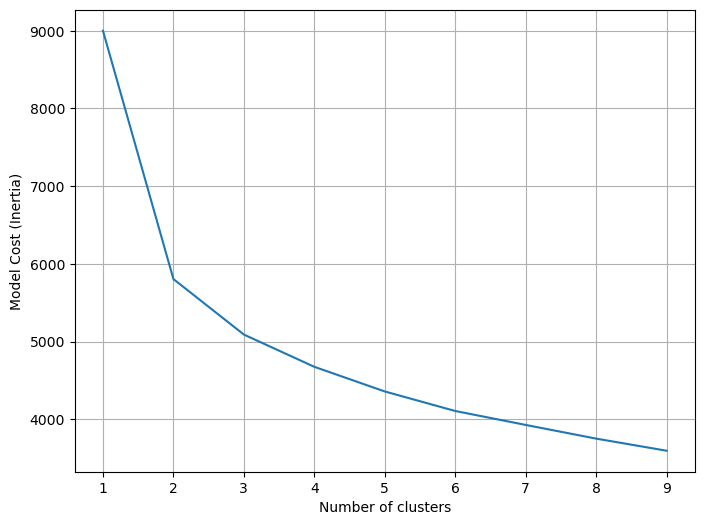

In [41]:
inertia = []
k_range = range(1, 10)
for k in k_range:
    model = KMeans(n_clusters=k, n_init=10).fit(billets_)  # Explicitly set n_init
    inertia.append(model.inertia_)
    
fig = plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Model Cost (Inertia)')
plt.grid()
plt.show()


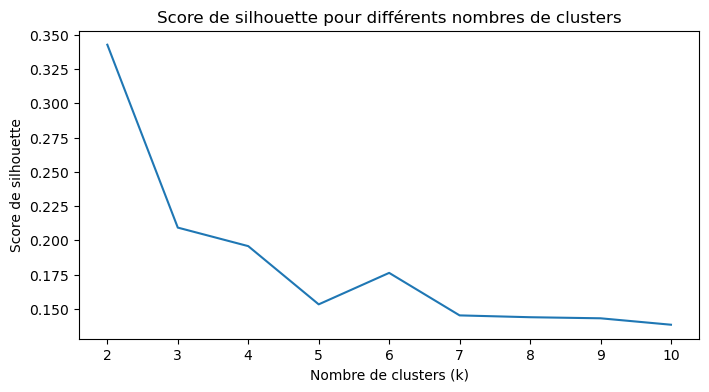

In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Données d'exemple
# billets_ = ...

# Plage de nombres de clusters à tester
k_range = range(2, 11)
tab_silhouette = []

for k in k_range:
    model = KMeans(n_clusters=k, n_init='auto')  # Explicitly set n_init to avoid the warning
    cluster_labels = model.fit_predict(billets_)
    tab_silhouette.append(silhouette_score(billets_, cluster_labels))

fig = plt.figure(figsize=(8, 4))
plt.plot(k_range, tab_silhouette)
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour différents nombres de clusters')
plt.show()


### Appliquer K-means

is_genuine  kmeans_pred
False       0               10
            1              380
True        0              772
            1                6
dtype: int64
      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95    4.520000       2.89   
1           True    171.46       103.36        103.66    3.770000       2.99   
2           True    172.69       104.48        103.50    4.400000       2.94   
3           True    171.36       103.91        103.94    3.620000       3.01   
4           True    171.73       104.28        103.46    4.040000       3.48   
...          ...       ...          ...           ...         ...        ...   
1163       False    171.57       104.27        104.44    5.026958       3.21   
1164       False    171.40       104.38        104.19    4.774697       3.17   
1165       False    172.08       104.15        104.17    4.781467       3.40   
1166       False    171.72       104.46

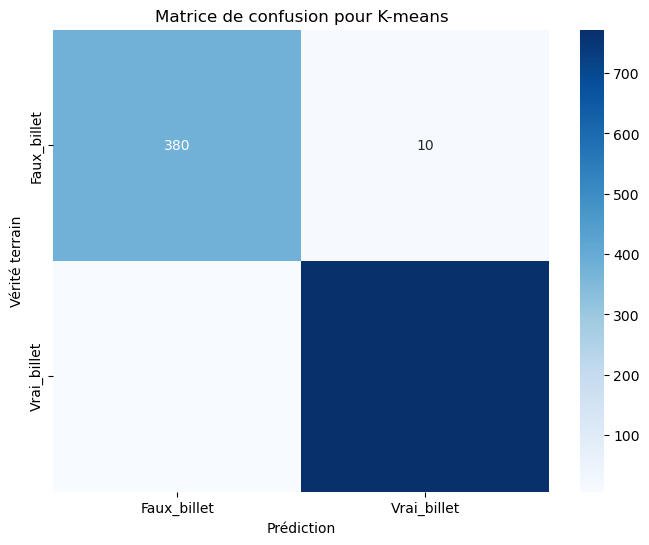

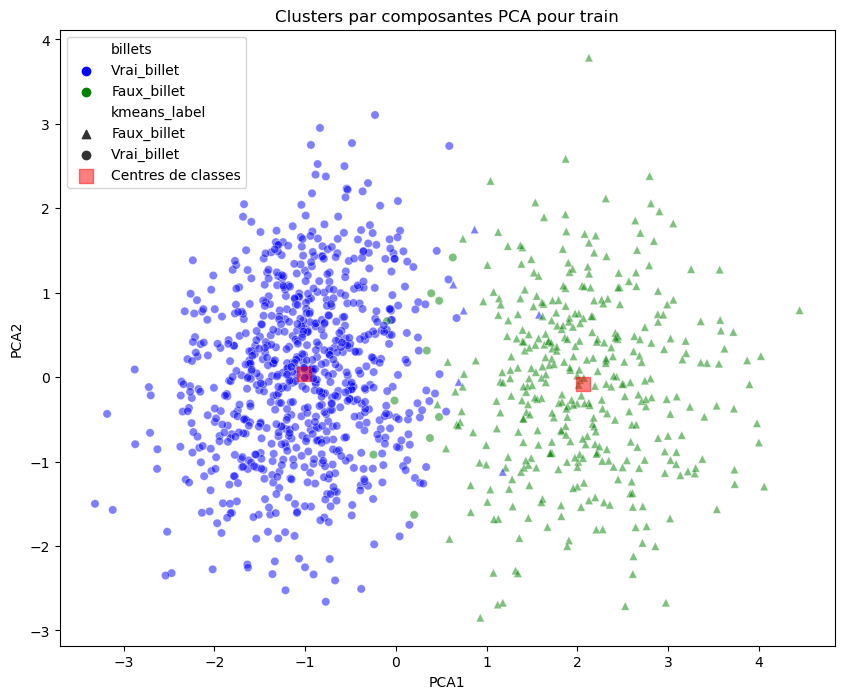

In [43]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Standardisation des données d'entraînement XTrain
scaler = StandardScaler()
billets_std_train = scaler.fit_transform(XTrain)

# Ajustement de PCA aux données standardisées
pca = PCA()
pca.fit(billets_std_train)

# Transformation des données standardisées en scores PCA
scores_pca_train = pca.transform(billets_std_train)

# Initialisation de K-Means avec 2 clusters, méthode d'initialisation 'k-means++' et random_state pour la reproductibilité
kmeans_pca_train = KMeans(n_clusters=2, init='k-means++', n_init=10, random_state=100)

# Entraînement de K-Means sur les données standardisées et transformées par PCA
kmeans_pca_train.fit(billets_std_train)

# Faire des prédictions sur les données d'entraînement
yTrain_kmeans_pred = kmeans_pca_train.predict(billets_std_train)

# Vérifier le mappage initial
# Créer un DataFrame pour comparer les résultats de K-means et la vérité terrain
df_comparison = pd.DataFrame({'is_genuine': yTrain, 'kmeans_pred': yTrain_kmeans_pred})

# Compter les valeurs pour vérifier si le mappage est correct
print(df_comparison.groupby(['is_genuine', 'kmeans_pred']).size())

# Si le mappage est incorrect (c'est-à-dire si les clusters sont inversés), inverse les prédictions
if df_comparison[(df_comparison['is_genuine'] == True) & (df_comparison['kmeans_pred'] == 0)].shape[0] > df_comparison[(df_comparison['is_genuine'] == True) & (df_comparison['kmeans_pred'] == 1)].shape[0]:
    yTrain_kmeans_pred = 1 - yTrain_kmeans_pred  # Inverser les clusters

# Convertir les prédictions de K-means de 0/1 en False/True
yTrain_kmeans_pred = yTrain_kmeans_pred == 1

# Concaténation des données d'entraînement des billets avec les scores PCA transformés
df_clus_pca_kmeans_train = pd.concat([billets_train.reset_index(drop=True), pd.DataFrame(scores_pca_train)], axis=1)

# Attribution de noms spécifiques aux colonnes des scores PCA dans le dataframe
df_clus_pca_kmeans_train.columns.values[-6:] = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']

# Ajouter les prédictions de K-means au DataFrame
df_clus_pca_kmeans_train['kmeans'] = yTrain_kmeans_pred

# Mapper les valeurs de 'is_genuine' à des étiquettes lisibles
df_clus_pca_kmeans_train['billets'] = df_clus_pca_kmeans_train['is_genuine'].map({True: 'Vrai_billet', False: 'Faux_billet'})

# Mapper les valeurs K-means à des étiquettes lisibles
df_clus_pca_kmeans_train['kmeans_label'] = df_clus_pca_kmeans_train['kmeans'].map({True: 'Vrai_billet', False: 'Faux_billet'})

# Afficher le DataFrame final pour vérifier les mappages
print(df_clus_pca_kmeans_train)

# Évaluation avec matrice de confusion
cm_kmeans_train = confusion_matrix(yTrain, yTrain_kmeans_pred)
print("Matrice de confusion pour K-means:")
print(cm_kmeans_train)

# Évaluation avec rapport de classification
print("Rapport de classification pour K-means:")
print(classification_report(yTrain, yTrain_kmeans_pred))

# Matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm_kmeans_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Faux_billet', 'Vrai_billet'], yticklabels=['Faux_billet', 'Vrai_billet'])
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion pour K-means')
plt.show()

# Représentation des billets dans le plan (Train)
# Définir les nouvelles couleurs et symboles
markers = {'Vrai_billet': "o", 'Faux_billet': "^"}  # Utilisez "o" pour les cercles et "^" pour les triangles
colors = {'Vrai_billet': 'blue', 'Faux_billet': 'green'}  # Choisissez vos couleurs (par exemple, bleu et vert)

x_axis = df_clus_pca_kmeans_train['PCA1']
y_axis = df_clus_pca_kmeans_train['PCA2']

# Tracer le nuage de points avec les nouvelles couleurs et symboles
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_clus_pca_kmeans_train, x=x_axis, y=y_axis, hue='billets', style='kmeans_label', palette=colors, markers=markers, alpha=0.5)

# Affichage des positions des centres de classes
centroids = kmeans_pca_train.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:, 0], centroids_projected[:, 1], color='red', marker='s', label='Centres de classes', s=100, alpha=0.5)

plt.title('Clusters par composantes PCA pour train')
plt.legend()
plt.show()

### Faire des prédictions et évaluer K-means

### Évaluer la performance du modèle K-means

### Visualisation des clusters K-means

Nous remarquons que certains points, à l'interface entre les 2 clusters, peuvent être mal attribués.

# TEST K MEANS

is_genuine  kmeans_pred
False       0                3
            1              107
True        0              218
            1                4
dtype: int64
     is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0          True    171.84       104.59        104.00    3.880000       3.27   
1          True    172.20       104.35        103.67    4.440000       3.38   
2          True    171.30       104.19        103.70    4.120000       2.82   
3          True    171.90       103.67        103.15    4.550000       3.15   
4          True    171.87       103.91        103.96    3.740000       2.97   
..          ...       ...          ...           ...         ...        ...   
327        True    171.96       103.84        103.62    3.629682       3.01   
328        True    171.37       104.07        103.75    4.234759       3.07   
329       False    171.59       104.05        103.94    5.037325       3.02   
330       False    172.17       104.49        103

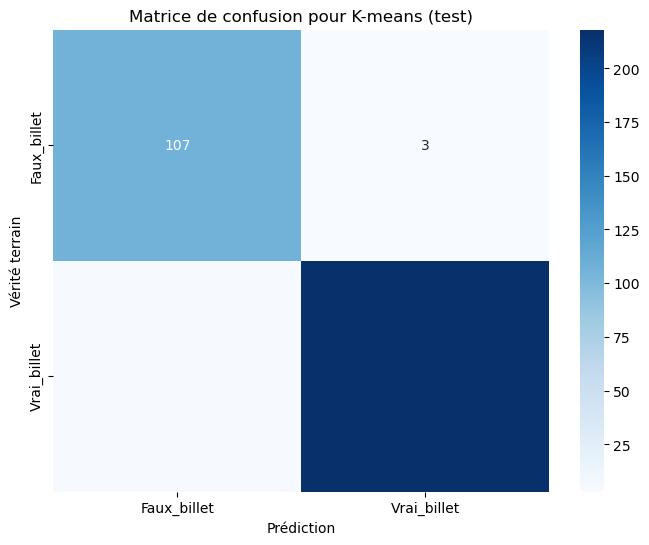

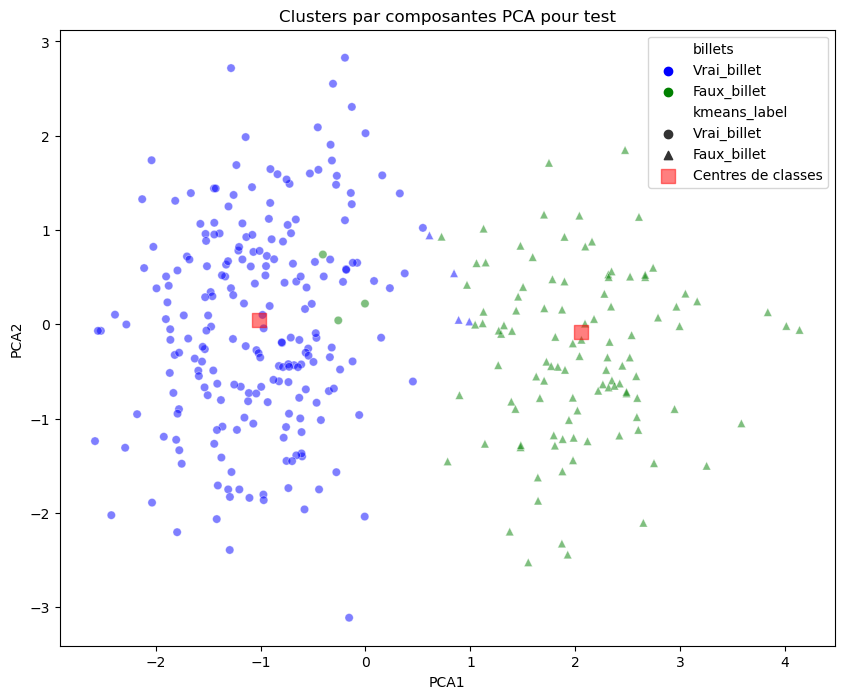

In [44]:
# --- Application aux données de test ---

# Standardisation des données de test XTest
billets_std_test = scaler.transform(XTest)

# Transformation des données standardisées en scores PCA
scores_pca_test = pca.transform(billets_std_test)

# Faire des prédictions sur les données de test
yTest_kmeans_pred = kmeans_pca_train.predict(billets_std_test)

# Vérifier le mappage initial sur les données de test
df_comparison_test = pd.DataFrame({'is_genuine': yTest, 'kmeans_pred': yTest_kmeans_pred})
print(df_comparison_test.groupby(['is_genuine', 'kmeans_pred']).size())

# Si le mappage est incorrect (clusters inversés), inverse les prédictions
if df_comparison_test[(df_comparison_test['is_genuine'] == True) & (df_comparison_test['kmeans_pred'] == 0)].shape[0] > df_comparison_test[(df_comparison_test['is_genuine'] == True) & (df_comparison_test['kmeans_pred'] == 1)].shape[0]:
    yTest_kmeans_pred = 1 - yTest_kmeans_pred  # Inverser les clusters

# Convertir les prédictions de K-means de 0/1 en False/True
yTest_kmeans_pred = yTest_kmeans_pred == 1

# Concaténation des données de test des billets avec les scores PCA transformés
df_clus_pca_kmeans_test = pd.concat([billets_test.reset_index(drop=True), pd.DataFrame(scores_pca_test)], axis=1)
df_clus_pca_kmeans_test.columns.values[-6:] = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']
df_clus_pca_kmeans_test['kmeans'] = yTest_kmeans_pred
df_clus_pca_kmeans_test['billets'] = df_clus_pca_kmeans_test['is_genuine'].map({True: 'Vrai_billet', False: 'Faux_billet'})
df_clus_pca_kmeans_test['kmeans_label'] = df_clus_pca_kmeans_test['kmeans'].map({True: 'Vrai_billet', False: 'Faux_billet'})

# Afficher le DataFrame final pour vérifier les mappages
print(df_clus_pca_kmeans_test)

# Évaluation avec matrice de confusion
cm_kmeans_test = confusion_matrix(yTest, yTest_kmeans_pred)
print("Matrice de confusion pour K-means (test):")
print(cm_kmeans_test)
print("Rapport de classification pour K-means (test):")
print(classification_report(yTest, yTest_kmeans_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_kmeans_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Faux_billet', 'Vrai_billet'], yticklabels=['Faux_billet', 'Vrai_billet'])
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion pour K-means (test)')
plt.show()

# Représentation des billets dans le plan (Test)
x_axis_test = df_clus_pca_kmeans_test['PCA1']
y_axis_test = df_clus_pca_kmeans_test['PCA2']
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_clus_pca_kmeans_test, x=x_axis_test, y=y_axis_test, hue='billets', style='kmeans_label', palette=colors, markers=markers, alpha=0.5)
plt.scatter(centroids_projected[:, 0], centroids_projected[:, 1], color='red', marker='s', label='Centres de classes', s=100, alpha=0.5)
plt.title('Clusters par composantes PCA pour test')
plt.legend()
plt.show()


### Appliquer K-means

### Faire des prédictions et évaluer K-means

### Évaluer la performance du modèle K-means

### Visualisation des clusters K-means

# Régression logistique

# Train

      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95    4.520000       2.89   
1           True    171.46       103.36        103.66    3.770000       2.99   
2           True    172.69       104.48        103.50    4.400000       2.94   
3           True    171.36       103.91        103.94    3.620000       3.01   
4           True    171.73       104.28        103.46    4.040000       3.48   
...          ...       ...          ...           ...         ...        ...   
1163       False    171.57       104.27        104.44    5.026958       3.21   
1164       False    171.40       104.38        104.19    4.774697       3.17   
1165       False    172.08       104.15        104.17    4.781467       3.40   
1166       False    171.72       104.46        104.12    5.698913       3.61   
1167       False    172.66       104.33        104.41    5.194886       3.56   

      length      PCA1      PCA2      P

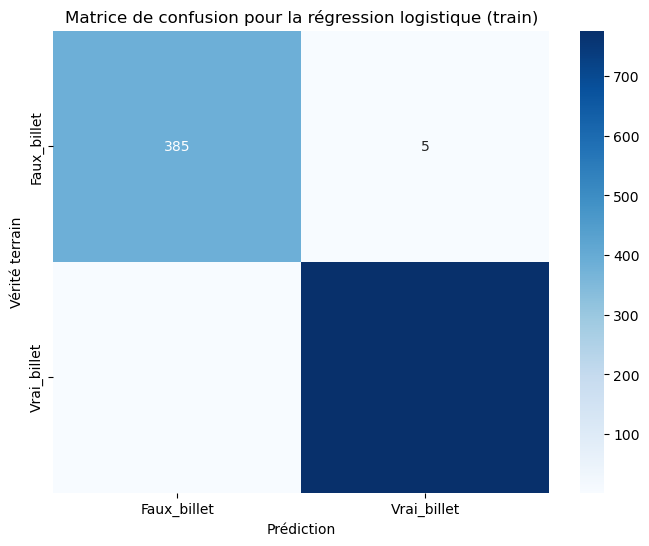

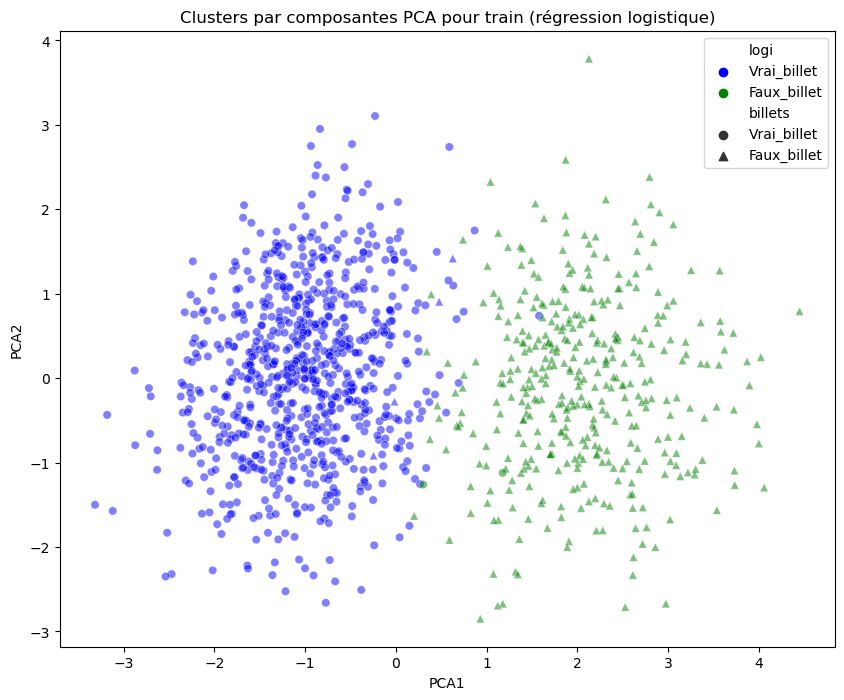

In [45]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que billets_train, XTrain et yTrain sont déjà définis
# billets_train = pd.read_csv('path_to_train_data.csv')
# XTrain = billets_train.iloc[:, 1:7]
# yTrain = billets_train.iloc[:, 0]

# Standardisation des données d'entraînement XTrain
scaler = StandardScaler()
XTrain_std = scaler.fit_transform(XTrain)

# Ajustement de PCA aux données standardisées
pca = PCA()
pca.fit(XTrain_std)

# Transformation des données standardisées en scores PCA
scores_pca_train = pca.transform(XTrain_std)

# Créer une instance du modèle de régression logistique
model_reg_log = LogisticRegression()

# Entraîner le modèle avec les données d'entraînement
model_reg_log.fit(XTrain_std, yTrain)

# Faire des prédictions sur les données d'entraînement
yTrain_pred = model_reg_log.predict(XTrain_std)

# Concaténation des données d'entraînement avec les scores PCA
df_reg_log_train = pd.concat([billets_train.reset_index(drop=True), pd.DataFrame(scores_pca_train)], axis=1)

# Attribution de noms spécifiques aux colonnes des scores PCA
df_reg_log_train.columns.values[-6:] = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']

# Ajouter les prédictions de régression logistique au DataFrame
df_reg_log_train['logistique'] = model_reg_log.predict(XTrain_std)

# Mapper les valeurs de 'is_genuine' à des étiquettes lisibles
df_reg_log_train['billets'] = df_reg_log_train['is_genuine'].map({True: 'Vrai_billet', False: 'Faux_billet'})

# Comparer le nombre de prédictions pour chaque classe (True/False)
if df_reg_log_train[df_reg_log_train['logistique'] == False].shape[0] < df_reg_log_train[df_reg_log_train['logistique'] == True].shape[0]:
    # Mapper les valeurs logistiques : True -> Vrai_billet, False -> Faux_billet
    df_reg_log_train['logi'] = df_reg_log_train['logistique'].map({True: 'Vrai_billet', False: 'Faux_billet'})
else:
    # Mapper les valeurs logistiques : False -> Vrai_billet, True -> Faux_billet
    df_reg_log_train['logi'] = df_reg_log_train['logistique'].map({False: 'Vrai_billet', True: 'Faux_billet'})

# Afficher le DataFrame final pour vérifier les mappages
print(df_reg_log_train)

# Évaluer la performance du modèle sur les données d'entraînement
print(f"Exactitude sur les données d'entraînement : {accuracy_score(yTrain, yTrain_pred)}")
print(f"Matrice de confusion sur les données d'entraînement :\n{confusion_matrix(yTrain, yTrain_pred)}")
print(f"Rapport de classification sur les données d'entraînement :\n{classification_report(yTrain, yTrain_pred)}")

# Matrice de confusion
cm_log_train = confusion_matrix(yTrain, yTrain_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Faux_billet', 'Vrai_billet'], yticklabels=['Faux_billet', 'Vrai_billet'])
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion pour la régression logistique (train)')
plt.show()

# Représentation des billets dans le plan (Train)
# Définir les nouvelles couleurs et symboles
markers = {'Vrai_billet': "o", 'Faux_billet': "^"}  # Utilisez "o" pour les cercles et "^" pour les triangles
colors = {'Vrai_billet': 'blue', 'Faux_billet': 'green'}  # Choisissez vos couleurs (par exemple, bleu et vert)

x_axis = df_reg_log_train['PCA1']
y_axis = df_reg_log_train['PCA2']

# Tracer le nuage de points avec les nouvelles couleurs et symboles
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_reg_log_train, x=x_axis, y=y_axis, hue='logi', style='billets', palette=colors, markers=markers, alpha=0.5)

plt.title('Clusters par composantes PCA pour train (régression logistique)')
plt.legend()  # Afficher la légende
plt.show()

# TEST

     is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0          True    171.84       104.59        104.00    3.880000       3.27   
1          True    172.20       104.35        103.67    4.440000       3.38   
2          True    171.30       104.19        103.70    4.120000       2.82   
3          True    171.90       103.67        103.15    4.550000       3.15   
4          True    171.87       103.91        103.96    3.740000       2.97   
..          ...       ...          ...           ...         ...        ...   
327        True    171.96       103.84        103.62    3.629682       3.01   
328        True    171.37       104.07        103.75    4.234759       3.07   
329       False    171.59       104.05        103.94    5.037325       3.02   
330       False    172.17       104.49        103.76    5.013806       2.93   
331       False    171.90       104.28        104.29    5.121098       3.24   

     length      PCA1      PCA2      PCA3      PCA4

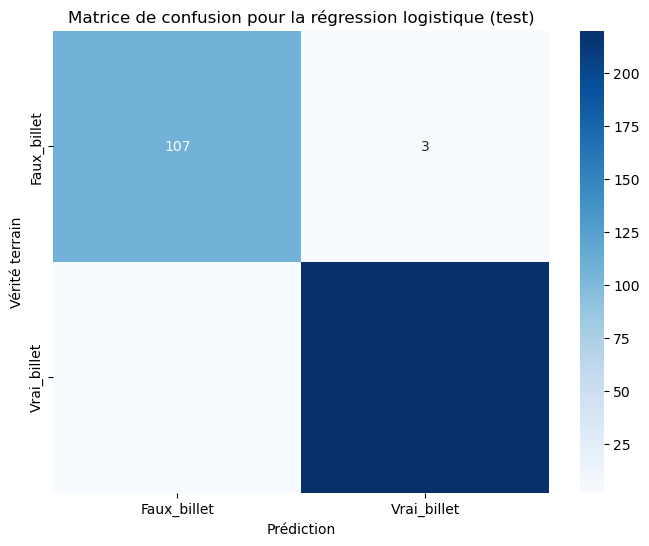

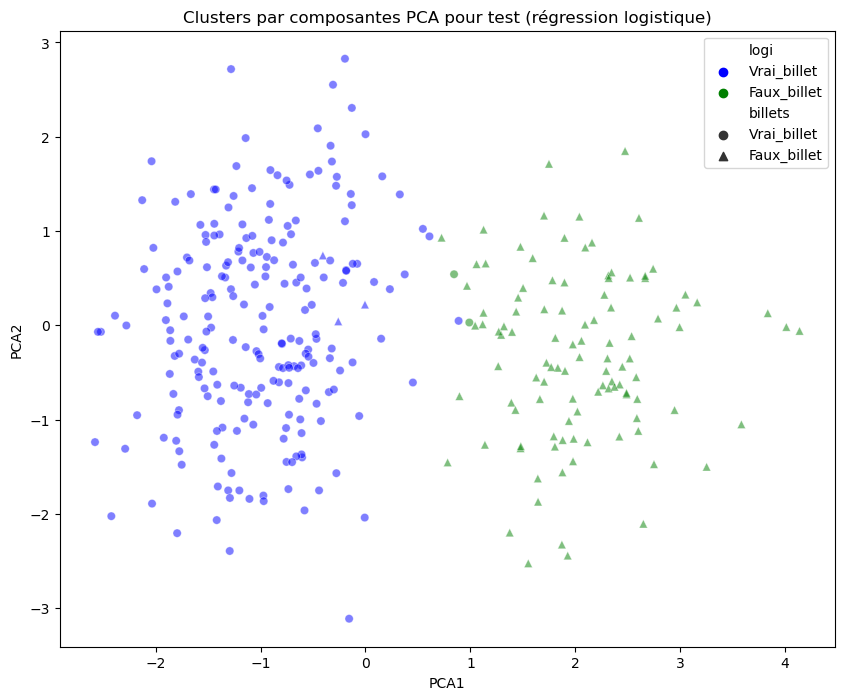

In [46]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Supposons que billets_test, XTest et yTest sont déjà définis
# billets_test = pd.read_csv('path_to_test_data.csv')
# XTest = billets_test.iloc[:, 1:7]
# yTest = billets_test.iloc[:, 0]

# Standardisation des données de test XTest avec le scaler déjà ajusté
XTest_std = scaler.transform(XTest)

# Transformation des données standardisées de test en scores PCA avec le modèle PCA déjà ajusté
scores_pca_test = pca.transform(XTest_std)

# Faire des prédictions sur les données de test
yTest_pred = model_reg_log.predict(XTest_std)

# Concaténation des données de test avec les scores PCA
df_reg_log_test = pd.concat([billets_test.reset_index(drop=True), pd.DataFrame(scores_pca_test)], axis=1)

# Attribution de noms spécifiques aux colonnes des scores PCA
df_reg_log_test.columns.values[-6:] = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']

# Ajouter les prédictions de régression logistique au DataFrame
df_reg_log_test['logistique'] = yTest_pred

# Mapper les valeurs de 'is_genuine' à des étiquettes lisibles
df_reg_log_test['billets'] = df_reg_log_test['is_genuine'].map({True: 'Vrai_billet', False: 'Faux_billet'})

# Comparer le nombre de prédictions pour chaque classe (True/False)
if df_reg_log_test[df_reg_log_test['logistique'] == False].shape[0] < df_reg_log_test[df_reg_log_test['logistique'] == True].shape[0]:
    # Mapper les valeurs logistiques : True -> Vrai_billet, False -> Faux_billet
    df_reg_log_test['logi'] = df_reg_log_test['logistique'].map({True: 'Vrai_billet', False: 'Faux_billet'})
else:
    # Mapper les valeurs logistiques : False -> Vrai_billet, True -> Faux_billet
    df_reg_log_test['logi'] = df_reg_log_test['logistique'].map({False: 'Vrai_billet', True: 'Faux_billet'})

# Afficher le DataFrame final pour vérifier les mappages
print(df_reg_log_test)

# Évaluer la performance du modèle sur les données de test
print(f"Exactitude sur les données de test : {accuracy_score(yTest, yTest_pred)}")
print(f"Matrice de confusion sur les données de test :\n{confusion_matrix(yTest, yTest_pred)}")
print(f"Rapport de classification sur les données de test :\n{classification_report(yTest, yTest_pred)}")

# Matrice de confusion
cm_log_test = confusion_matrix(yTest, yTest_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Faux_billet', 'Vrai_billet'], yticklabels=['Faux_billet', 'Vrai_billet'])
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion pour la régression logistique (test)')
plt.show()

# Représentation des billets dans le plan (Test)
# Définir les nouvelles couleurs et symboles
markers = {'Vrai_billet': "o", 'Faux_billet': "^"}  # Utilisez "o" pour les cercles et "^" pour les triangles
colors = {'Vrai_billet': 'blue', 'Faux_billet': 'green'}  # Choisissez vos couleurs (par exemple, bleu et vert)

x_axis = df_reg_log_test['PCA1']
y_axis = df_reg_log_test['PCA2']

# Tracer le nuage de points avec les nouvelles couleurs et symboles
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_reg_log_test, x=x_axis, y=y_axis, hue='logi', style='billets', palette=colors, markers=markers, alpha=0.5)

plt.title('Clusters par composantes PCA pour test (régression logistique)')
plt.legend()  # Afficher la légende
plt.show()


# Comparaison des modèles 

Explication détaillée des métriques :

1. **Accuracy (Exactitude)** : C'est le ratio du nombre de prédictions correctes sur le nombre total de prédictions. C'est une mesure globale de la performance du modèle.

2. **Precision (Précision)** : C'est le ratio des vrais positifs sur le total des prédictions positives (vrais positifs + faux positifs). La précision mesure la qualité des prédictions positives faites par le modèle.

3. **Recall (Rappel)** : C'est le ratio des vrais positifs sur le total des éléments pertinents (vrais positifs + faux négatifs). Le rappel mesure la capacité du modèle à capturer tous les éléments pertinents.

4. **F1-Score** : C'est la moyenne harmonique de la précision et du rappel, offrant un équilibre entre ces deux métriques. Il est particulièrement utile lorsque vous avez besoin d'équilibrer précision et rappel.

Chaque métrique est multipliée par 100 pour être exprimée en pourcentage et arrondie à quatre décimales pour une présentation plus lisible.

In [47]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc

In [48]:
# Calculer l'accuracy (exactitude) du modèle K-means sur les données d'entraînement
# yTrain est la vraie étiquette, yTrain_kmeans_pred est l'étiquette prédite par le modèle
accuracy_kmeans_Train = accuracy_score(yTrain, yTrain_kmeans_pred).round(4) * 100
print("Accuracy kmeans_Train :", accuracy_kmeans_Train)

# Calculer la précision du modèle K-means sur les données d'entraînement
# La précision est le nombre de vrais positifs divisé par le nombre de vrais positifs et de faux positifs
precision_kmeans_Train = precision_score(yTrain, yTrain_kmeans_pred).round(4) * 100
print("Précision kmeans_Train :", precision_kmeans_Train)

# Calculer le rappel du modèle K-means sur les données d'entraînement
# Le rappel est le nombre de vrais positifs divisé par le nombre de vrais positifs et de faux négatifs
recall_kmeans_Train = recall_score(yTrain, yTrain_kmeans_pred).round(4) * 100
print("Recall kmeans_Train :", recall_kmeans_Train)

# Calculer le F1-score du modèle K-means sur les données d'entraînement
# Le F1-score est la moyenne harmonique de la précision et du rappel
f1_score_kmeans_Train = f1_score(yTrain, yTrain_kmeans_pred).round(4) * 100
print("F1-score kmeans_Train :", f1_score_kmeans_Train)

# Importer les fonctions nécessaires pour calculer la courbe ROC et l'AUC
from sklearn.metrics import roc_curve, auc

# Calculons la performance de notre modèle avec l'AUC ROC.
# L'AUC ROC mesure la performance globale de notre modèle et correspond à l'air sous la courbe ROC.

# Calculer les taux de faux positifs, les taux de vrais positifs et les seuils pour la courbe ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(yTrain, yTrain_kmeans_pred)

# Calculer l'aire sous la courbe ROC (AUC)
Auc_kmeans_Train = auc(false_positive_rate, true_positive_rate).round(4) * 100

# Afficher l'AUC pour les données d'entraînement
print("AUC kmeans_Train :", Auc_kmeans_Train)

Accuracy kmeans_Train : 98.63
Précision kmeans_Train : 98.72
Recall kmeans_Train : 99.22999999999999
F1-score kmeans_Train : 98.97
AUC kmeans_Train : 98.33


In [49]:
# Évaluer la performance du modèle sur les données de Test
accuracy_kmeans_Test= accuracy_score(yTest, yTest_kmeans_pred).round(4) * 100
print("Accuracy kmeans_Test :", accuracy_kmeans_Test)

precision_kmeans_Test= precision_score(yTest, yTest_kmeans_pred).round(4) * 100
print("Précision kmeans_Test :", precision_kmeans_Test)

recall_kmeans_Test= recall_score(yTest, yTest_kmeans_pred).round(4) * 100
print("Recall kmeans_Test :", recall_kmeans_Test)

f1_score_kmeans_Test= f1_score(yTest, yTest_kmeans_pred).round(4) * 100
print("F1-score kmeans_Test :", f1_score_kmeans_Test)

# Calculons la performance de notre modèle avec l'AUC ROC.
# L'AUC ROC mesure la performance globale de notre modèle et correspond à l'air sous la courbe ROC.

# Calculer les taux de faux positifs, les taux de vrais positifs et les seuils pour la courbe ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(yTest, yTest_kmeans_pred)

# Calculer l'aire sous la courbe ROC (AUC)
Auc_kmeans_Test = auc(false_positive_rate, true_positive_rate).round(4) * 100

# Afficher l'AUC pour les données d'entraînement
print("AUC kmeans_Test :", Auc_kmeans_Test)

Accuracy kmeans_Test : 97.89
Précision kmeans_Test : 98.64
Recall kmeans_Test : 98.2
F1-score kmeans_Test : 98.42
AUC kmeans_Test : 97.74000000000001


In [50]:
# Évaluer la performance du modèle sur les données de Train LOGI
accuracy_Reglog_Train = accuracy_score(yTrain, yTrain_pred).round(4) * 100
print("Accuracy Reglog_Train :", accuracy_Reglog_Train)

precision_Reglog_Train = precision_score(yTrain, yTrain_pred).round(4) * 100
print("Précision Reglog_Train :", precision_Reglog_Train)

recall_Reglog_Train = recall_score(yTrain, yTrain_pred).round(4) * 100
print("Recall Reglog_Train :", recall_Reglog_Train)

f1_score_Reglog_Train = f1_score(yTrain, yTrain_pred).round(4) * 100
print("F1-score Reglog_Train :", f1_score_Reglog_Train)

false_positive_rate, true_positive_rate, thresholds = roc_curve(yTrain, yTrain_pred)
Auc_Reglog_Train = auc(false_positive_rate, true_positive_rate).round(4) * 100
print("AUC Reglog_Train :", Auc_Reglog_Train)

Accuracy Reglog_Train : 99.4
Précision Reglog_Train : 99.36
Recall Reglog_Train : 99.74
F1-score Reglog_Train : 99.55000000000001
AUC Reglog_Train : 99.22999999999999


In [51]:
# Évaluer la performance du modèle sur les données de Test LOGI
accuracy_Reglog_Test = accuracy_score(yTest, yTest_pred).round(4) * 100
print("Accuracy Reglog_Test :", accuracy_Reglog_Test)

precision_Reglog_Test = precision_score(yTest, yTest_pred).round(4) * 100
print("Précision Reglog_Test :", precision_Reglog_Test)

recall_Reglog_Test = recall_score(yTest, yTest_pred).round(4) * 100
print("Recall Reglog_Test :", recall_Reglog_Test)

f1_score_Reglog_Test = f1_score(yTest, yTest_pred).round(4) * 100
print("F1-score Reglog_Test :", f1_score_Reglog_Test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(yTest, yTest_pred)
Auc_Reglog_Test = auc(false_positive_rate, true_positive_rate).round(4) * 100
print("AUC Reglog_Test :", Auc_Reglog_Test)

Accuracy Reglog_Test : 98.49
Précision Reglog_Test : 98.65
Recall Reglog_Test : 99.1
F1-score Reglog_Test : 98.88
AUC Reglog_Test : 98.19


In [52]:
cols=[
    'Kmeans_Train',
      'Kmeans_Test',
      'Reglog_Train',
      'Reglog_Test'
     ]

index=['Accuracy','Precison','Recall','F1_Score','Auc_Roc']

Comp_modèle=pd.DataFrame(index=index,columns=cols)

Comp_modèle['Kmeans_Train']=[accuracy_kmeans_Train,precision_kmeans_Train,recall_kmeans_Train,f1_score_kmeans_Train,Auc_kmeans_Train]
Comp_modèle['Kmeans_Test']=[accuracy_kmeans_Test,precision_kmeans_Test,recall_kmeans_Test,f1_score_kmeans_Test,Auc_kmeans_Test]
Comp_modèle['Reglog_Train']=[accuracy_Reglog_Train,precision_Reglog_Train,recall_Reglog_Train,f1_score_Reglog_Train,Auc_Reglog_Train]
Comp_modèle['Reglog_Test']=[accuracy_Reglog_Test,precision_Reglog_Test,recall_Reglog_Test,f1_score_Reglog_Test,Auc_Reglog_Test]


Comp_modèle

,Kmeans_Train,Kmeans_Test,Reglog_Train,Reglog_Test
Accuracy,98.63,97.89,99.40,98.49
Precison,98.72,98.64,99.36,98.65
Recall,99.23,98.20,99.74,99.10
F1_Score,98.97,98.42,99.55,98.88
Auc_Roc,98.33,97.74,99.23,98.19


In [53]:
cols=[
      'Kmeans',
      'Reglog'
     ]

index=['Accuracy','Precison','Recall','F1_Score','Auc_Roc']

Comp_modèle=pd.DataFrame(index=index,columns=cols)

Comp_modèle['Kmeans']=[accuracy_kmeans_Test,precision_kmeans_Test,recall_kmeans_Test,f1_score_kmeans_Test,Auc_kmeans_Test]
Comp_modèle['Reglog']=[accuracy_Reglog_Test,precision_Reglog_Test,recall_Reglog_Test,f1_score_Reglog_Test,Auc_Reglog_Test]


Comp_modèle

,Kmeans,Reglog
Accuracy,97.89,98.49
Precison,98.64,98.65
Recall,98.20,99.10
F1_Score,98.42,98.88
Auc_Roc,97.74,98.19


#### Étape 1 : Assignation des identifiants uniques

In [54]:
# Ajouter des identifiants uniques à chaque DataFrame
df_clus_pca_kmeans_train['ID'] = range(1, len(df_clus_pca_kmeans_train) + 1)
df_clus_pca_kmeans_test['ID'] = range(1, len(df_clus_pca_kmeans_test) + 1)
df_reg_log_train['ID'] = range(1, len(df_reg_log_train) + 1)
df_reg_log_test['ID'] = range(1, len(df_reg_log_test) + 1)
# Affichage des premières lignes pour vérification
print("Premières lignes de df_clus_pca_kmeans_train avec ID :")
print(df_clus_pca_kmeans_train.head())
print("\nPremières lignes de df_clus_pca_kmeans_test avec ID :")
print(df_clus_pca_kmeans_test.head())
print("\nPremières lignes de df_reg_log_train avec ID :")
print(df_reg_log_train.head())
print("\nPremières lignes de df_reg_log_train avec ID :")
print(df_reg_log_test.head())

Premières lignes de df_clus_pca_kmeans_train avec ID :
   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length      PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  kmeans  \
0  112.83  1.578011  0.739124  2.557703  2.988025 -0.351744  0.062954   False   
1  113.09 -2.020529 -2.275944 -0.839433  0.065260 -0.036690 -0.474592    True   
2  113.16 -0.936954  2.750303  0.882592 -0.848678  0.891901  0.199636    True   
3  113.51 -1.410827 -1.831166  0.848861  0.679585 -0.768285 -0.216577    True   
4  112.54  0.133079 -0.501551  0.823412 -1.885107 -1.050179 -0.335539    True

### Étape 2 : Création des DataFrames pour l'analyse

In [55]:
# Sélection des colonnes pertinentes pour l'analyse
df_kmeans_train_analysis = df_clus_pca_kmeans_train[['ID', 'billets', 'kmeans_label']]
df_kmeans_test_analysis = df_clus_pca_kmeans_test[['ID', 'billets', 'kmeans_label']]
df_log_train_analysis = df_reg_log_train[['ID', 'billets', 'logi']]
df_log_test_analysis = df_reg_log_test[['ID', 'billets', 'logi']]  # Assurez-vous que df_reg_log_test est correctement défini

# Affichage des premières lignes pour vérification
print("Premières lignes de df_kmeans_train_analysis :")
print(df_kmeans_train_analysis.head())
print("\nPremières lignes de df_kmeans_test_analysis :")
print(df_kmeans_test_analysis.head())
print("\nPremières lignes de df_log_train_analysis :")
print(df_log_train_analysis.head())
print("\nPremières lignes de df_log_test_analysis :")
print(df_log_test_analysis.head())  # Assurez-vous que df_reg_log_test est correctement défini


Premières lignes de df_kmeans_train_analysis :
   ID      billets kmeans_label
0   1  Vrai_billet  Faux_billet
1   2  Vrai_billet  Vrai_billet
2   3  Vrai_billet  Vrai_billet
3   4  Vrai_billet  Vrai_billet
4   5  Vrai_billet  Vrai_billet

Premières lignes de df_kmeans_test_analysis :
   ID      billets kmeans_label
0   1  Vrai_billet  Vrai_billet
1   2  Vrai_billet  Vrai_billet
2   3  Vrai_billet  Vrai_billet
3   4  Vrai_billet  Vrai_billet
4   5  Vrai_billet  Vrai_billet

Premières lignes de df_log_train_analysis :
   ID      billets         logi
0   1  Vrai_billet  Vrai_billet
1   2  Vrai_billet  Vrai_billet
2   3  Vrai_billet  Vrai_billet
3   4  Vrai_billet  Vrai_billet
4   5  Vrai_billet  Vrai_billet

Premières lignes de df_log_test_analysis :
   ID      billets         logi
0   1  Vrai_billet  Vrai_billet
1   2  Vrai_billet  Vrai_billet
2   3  Vrai_billet  Vrai_billet
3   4  Vrai_billet  Vrai_billet
4   5  Vrai_billet  Vrai_billet


#### Étape 3 : Identification des billets mal classés

In [56]:
# Identifier les billets mal classés (faux positifs) pour K-Means et régression logistique
false_positives_kmeans_train = df_kmeans_train_analysis[(df_kmeans_train_analysis['billets'] == 'Faux_billet') & (df_kmeans_train_analysis['kmeans_label'] == 'Vrai_billet')]
false_positives_kmeans_test = df_kmeans_test_analysis[(df_kmeans_test_analysis['billets'] == 'Faux_billet') & (df_kmeans_test_analysis['kmeans_label'] == 'Vrai_billet')]
false_positives_log_train = df_log_train_analysis[(df_log_train_analysis['billets'] == 'Faux_billet') & (df_log_train_analysis['logi'] == 'Vrai_billet')]
false_positives_log_test = df_log_test_analysis[(df_log_test_analysis['billets'] == 'Faux_billet') & (df_log_test_analysis['logi'] == 'Vrai_billet')]

# Affichage des identifiants des billets mal classés pour chaque approche
print("Identifiants des billets mal classés par K-Means (faux positifs) dans les données d'entraînement :")
print(false_positives_kmeans_train['ID'].tolist())
print("\nIdentifiants des billets mal classés par K-Means (faux positifs) dans les données de test :")
print(false_positives_kmeans_test['ID'].tolist())
print("\nIdentifiants des billets mal classés par régression logistique (faux positifs) dans les données d'entraînement :")
print(false_positives_log_train['ID'].tolist())
print("\nIdentifiants des billets mal classés par régression logistique (faux positifs) dans les données de test :")
print(false_positives_log_test['ID'].tolist())


Identifiants des billets mal classés par K-Means (faux positifs) dans les données d'entraînement :
[775, 816, 818, 833, 848, 879, 964, 1038, 1053, 1128]

Identifiants des billets mal classés par K-Means (faux positifs) dans les données de test :
[233, 300, 303]

Identifiants des billets mal classés par régression logistique (faux positifs) dans les données d'entraînement :
[775, 818, 833, 848, 879]

Identifiants des billets mal classés par régression logistique (faux positifs) dans les données de test :
[233, 300, 303]


### Étape 4 : Comparaison des listes et approche hybride

In [57]:
# Comparaison des listes de faux positifs (IDs) pour les données d'entraînement
logistic_fp_ids_train = set(false_positives_log_train['ID'])
print(logistic_fp_ids_train)
kmeans_fp_ids_train = set(false_positives_kmeans_train['ID'])
print(kmeans_fp_ids_train)
# Comparaison des listes de faux positifs (IDs) pour les données de test
logistic_fp_ids_test = set(false_positives_log_test['ID'])
print(logistic_fp_ids_test)
kmeans_fp_ids_test = set(false_positives_kmeans_test['ID'])
print(kmeans_fp_ids_test)


{833, 775, 879, 848, 818}
{833, 964, 775, 1128, 1038, 879, 816, 848, 818, 1053}
{233, 300, 303}
{233, 300, 303}


In [77]:
# Vérification de l'inclusion stricte pour les données d'entraînement
if logistic_fp_ids_train.issubset(kmeans_fp_ids_train):
    print("1. La liste des faux positifs de la régression logistique est incluse dans celle de K-Means pour les données d'entraînement.")
    print("   Approche recommandée pour les données d'entraînement : Utiliser la régression logistique.")
elif kmeans_fp_ids_train.issubset(logistic_fp_ids_train):
    print("1. La liste des faux positifs de K-Means est incluse dans celle de la régression logistique pour les données d'entraînement.")
    print("   Approche recommandée pour les données d'entraînement : Utiliser K-Means.")
else:
    print("1. Aucune inclusion stricte pour les données d'entraînement. Approche hybride recommandée avec pondération.")


1. La liste des faux positifs de la régression logistique est incluse dans celle de K-Means pour les données d'entraînement.
   Approche recommandée pour les données d'entraînement : Utiliser la régression logistique.


In [58]:
# Vérification de l'inclusion stricte pour les données de test
if logistic_fp_ids_test.issubset(kmeans_fp_ids_test):
    print("\n2. La liste des faux positifs de la régression logistique est incluse dans celle de K-Means pour les données de test.")
    print("   Approche recommandée pour les données de test : Utiliser la régression logistique.")
elif kmeans_fp_ids_test.issubset(logistic_fp_ids_test):
    print("\n2. La liste des faux positifs de K-Means est incluse dans celle de la régression logistique pour les données de test.")
    print("   Approche recommandée pour les données de test : Utiliser K-Means.")
else:
    print("\n2. Aucune inclusion stricte pour les données de test. Approche hybride recommandée avec pondération.")



2. La liste des faux positifs de la régression logistique est incluse dans celle de K-Means pour les données de test.
   Approche recommandée pour les données de test : Utiliser la régression logistique.


### Enregistrement du modèle

In [60]:
# Importation de la bibliothèque joblib pour enregistrer les modèles
import joblib

# Enregistrer le modèle, le scaler et le PCA
joblib.dump(model_reg_log, 'RESULTATS/model_reg_log.pkl')
joblib.dump(scaler, 'RESULTATS/scaler.pkl')
joblib.dump(pca, 'RESULTATS/pca.pkl')

print("Modèle de régression logistique, scaler et PCA enregistrés avec succès.")


Modèle de régression logistique, scaler et PCA enregistrés avec succès.
